In [8]:
import joblib
import numpy as np
import glob
from PIL import Image
import msi_visual
from importlib import reload
from msi_visual import parametric_umap
reload(parametric_umap)
from keras.callbacks import Callback
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"EPOCH {epoch}")

keras_fit_kwargs = {"callbacks": [MyCallback()]}

paths = glob.glob("D:\maldi\slides\slide2_notol_5_bin\\*.npy")[:1]

umap = parametric_umap.UMAPVirtualStain(start_bin=0, end_bin=100)
images = [np.load(p)[::64, ::64, :] for p in paths]
umap.fit(images, keras_fit_kwargs=keras_fit_kwargs)

d:\miniconda3\envs\dl\Lib\site-packages\umap\parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(
d:\miniconda3\envs\dl\Lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. 50.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]] None
(25, 100)
ParametricUMAP(dims=(100,), encoder=<keras.engine.sequential.Sequential object at 0x0000013778C87E10>, keras_fit_kwargs={'callbacks': [<__main__.MyCallback object at 0x00000137E1DD5C10>]}, loss_report_frequency=100, optimizer=<keras.optimizers.adam.Adam object at 0x00000137DBEF5190>, run_eagerly=True)
Sat Mar  9 15:40:24 2024 Construct fuzzy simplicial set
Sat Mar  9 15:40:24 2024 Finding Nearest Neighbors
Sat Mar  9 15:40:24 2024 Finished Nearest Neighbor Search
Sat Mar  9 15:40:24 2024 Construct embedding
self.dims (100,)
Epoch 1/100
51/51 [==============================] - 5s 101ms/step - loss: 0.4961
Epoch 2/100
51/51 [==============================] - 5s 100ms/step - loss: 0.4805
Epoch 3/100
51/51 [==============================] - 5s 99ms/step - loss: 0.4948
Epoch 4/100
51/51 

KeyboardInterrupt: 

In [14]:
import msi_visual
from msi_visual import parametric_umap
from pathlib import Path
umap.encoder.save(Path("umap_models") / "umap.keras")

joblib.dump(umap.umap, Path("umap_models") / "msi_umap.joblib")

umap.save("umap_models")
# umap.load("umap_models")

paths = glob.glob("D:\maldi\slides\slide2_notol_5_bin\\*.npy")[:1]
img = np.load(paths[0])

mask = umap.predict(img)
print(mask.shape)

saved encoder
75/75 [==============================] - 0s 3ms/step
(262, 286, 1)


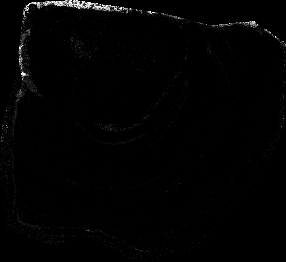

In [ ]:
from msi_visual.utils import normalize_image_grayscale, image_histogram_equalization

mask = normalize_image_grayscale(mask)[:, :, 0]
Image.fromarray(np.uint8(mask*255))


In [ ]:
import joblib
joblub.dum

<function spatial_total_ion_count at 0x000001DB491F19E0>
